In [1]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

ret,dst = cv2.threshhold(src,thresh,maxval,type)
- maxval 能赋的最大值
- thresh阈值
- type变换类型
- ret 返回阈值大小

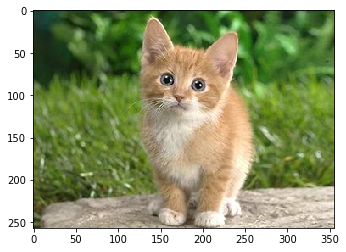

In [24]:
img = cv2.imread("cat.jpg")
r,g,b=cv2.split(img)
img=cv2.merge((b,g,r))
plt.imshow(img)
plt.show()

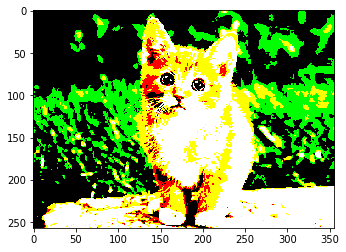

In [3]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)# 大于127为255，小于127为0
plt.imshow(thresh1)
plt.show()

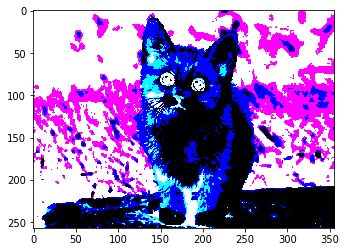

In [4]:
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)# 大于127为0，小于127为255
plt.imshow(thresh2)
plt.show()

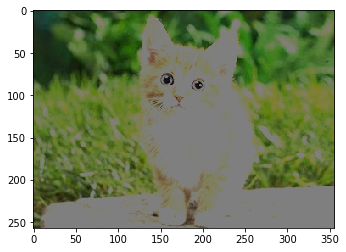

In [5]:
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)# 大于127为127 其他不变，截断
plt.imshow(thresh3)
plt.show()

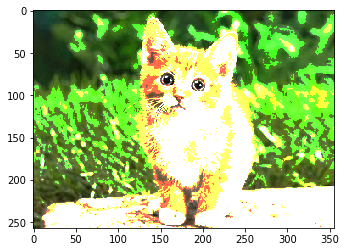

In [6]:
cat=img.copy()   # 大于127 为255 小于不变
for w in range(img.shape[0]):
    for y in range(img.shape[1]):
        for r in range(img.shape[2]):
            if cat[w,y,r] >= 127 :
                cat[w,y,r]=255
plt.imshow(cat)
plt.show()

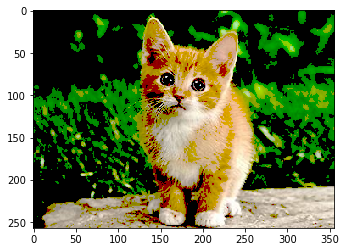

In [7]:
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)# 大于127不变，小于127为0
plt.imshow(thresh4)
plt.show()

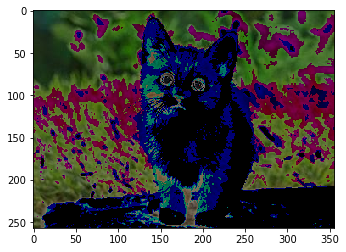

In [8]:
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)# 大于127变成0，小于127不变
plt.imshow(thresh5)
plt.show()

### 图像平滑

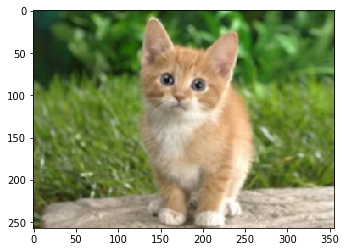

In [16]:
# 均值滤波 ，简单的平均卷积操作
blur = cv2.blur(img,(3,3))
plt.imshow(blur)
plt.show()

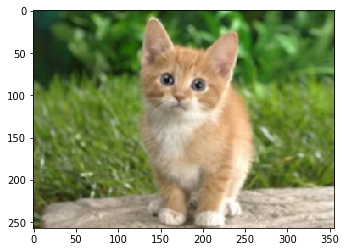

In [17]:
#方框滤波
box = cv2.boxFilter(img,-1,(3,3),normalize=True) #-1 表示通道数和原图一致
plt.imshow(box)
plt.show()

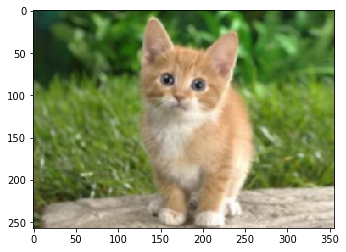

In [18]:
#高斯滤波
aussian = cv2.GaussianBlur(img,(5,5),1)
plt.imshow(aussian)
plt.show()

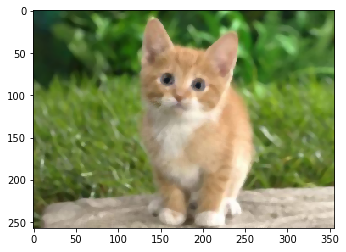

In [19]:
# 中值滤波 ，选中值
median = cv2.medianBlur(img,5) #去噪效果最好
plt.imshow(median)
plt.show()

## 图像的形态学处理

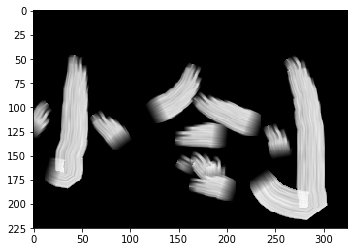

In [17]:
img = cv2.imread("xiaojian.png")
r,g,b=cv2.split(img)
img=cv2.merge((b,g,r))
plt.imshow(img)
plt.show()

### 腐蚀

目标去掉突刺

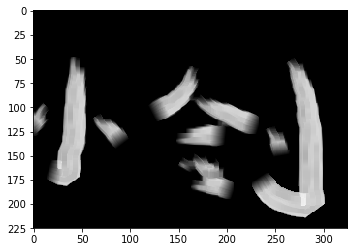

In [8]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel,iterations=2)
plt.imshow(erosion)
plt.show()

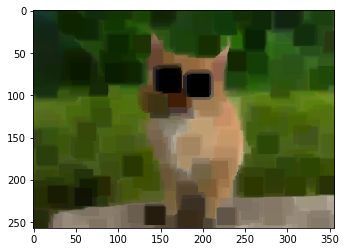

In [31]:
kernel = np.ones((5,5),np.uint8)
cat_erosion = cv2.erode(img,kernel,iterations=5)
plt.imshow(cat_erosion)
plt.show()

### 膨胀

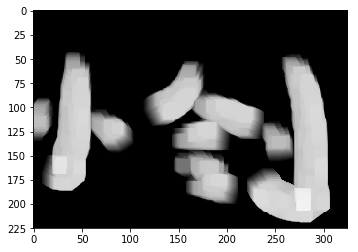

In [45]:
kernel = np.ones((3,3),np.uint8)
dige_erosion = cv2.dilate(erosion,kernel,iterations = 5)
plt.imshow(dige_erosion)
plt.show()

### 开闭运算

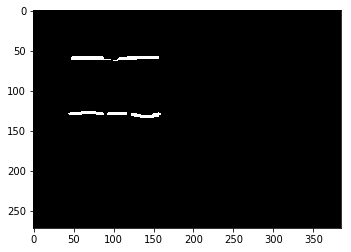

In [23]:
img = cv2.imread("kaibi.png")
r,g,b=cv2.split(img)
img=cv2.merge((b,g,r))
plt.imshow(img)
plt.show()

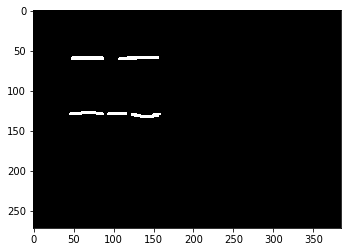

In [57]:
# 开运算 先腐蚀后膨胀
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
plt.imshow(opening)
plt.show()

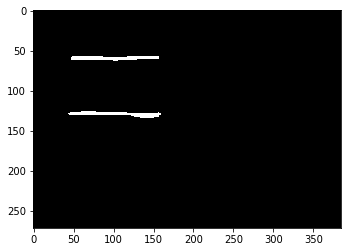

In [58]:
# 闭运算 先膨胀后腐蚀
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel,iterations=5)
plt.imshow(closing)
plt.show()

### 梯度运算

- 求轮廓
- 对原始图像分别做膨胀和腐蚀，最好相减

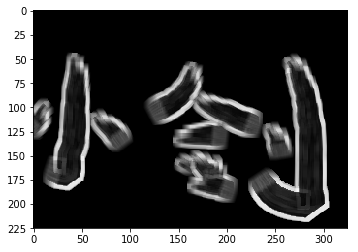

In [9]:
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
plt.imshow(gradient)
plt.show()

### 礼貌与黑帽
- 礼帽 原始图像-开运算
- 黑帽 闭运算-原始图像

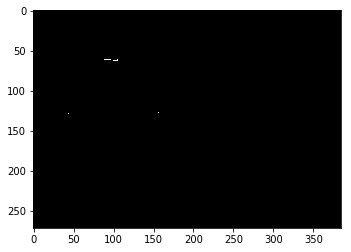

In [13]:
kernel = np.ones((3,3),np.uint8)
tophat = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
plt.imshow(tophat)
plt.show()

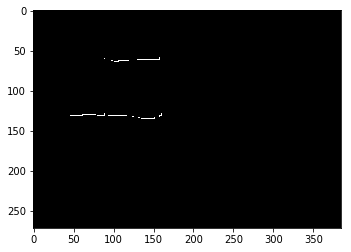

In [24]:
kernel = np.ones((2,2),np.uint8)
blackhat = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)
plt.imshow(blackhat)
plt.show()